## Importing data using panadas

In [17]:
import pandas as pd
import numpy as np


df = pd.read_csv('train.csv')
df.head(10)


,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,6,Life: Life Of Luxury: Elton John’s 6 Favorite ...,NaN,Ever wonder how Britain’s most iconic pop pian...,1
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
8,8,Excerpts From a Draft Script for Donald Trump’...,NaN,Donald J. Trump is scheduled to make a highly ...,0
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0


## Displaying shape of a DataFrame

In [18]:
# shape of dataframe
df.shape  # (20800, 5) -> 20800 rows with 5 columns (id, title, author, text, and label)

(20800, 5)

## Getting information regarding DataFrame

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


## Checking null values

In [20]:
df.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

## Replacing null values with blanck space

In [21]:
df = df.replace(np.nan, ' ')
df.shape

(20800, 5)

## After replacing NaN values 

In [22]:
df.head(15)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,6,Life: Life Of Luxury: Elton John’s 6 Favorite ...,,Ever wonder how Britain’s most iconic pop pian...,1
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
8,8,Excerpts From a Draft Script for Donald Trump’...,,Donald J. Trump is scheduled to make a highly ...,0
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0


## Checking for NaN values one more time

In [23]:
df.isnull().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

## Checking info after removing NaN

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20800 non-null  object
 2   author  20800 non-null  object
 3   text    20800 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


## Adding one more column in dataFrame which contains all three attributes with space saperated (title, author, text)

In [25]:
df['total'] = df['title'] + ' ' + df['author'] + ' ' + df['text']
df.head(15)
len(df['total'][1])

4232

## Importing nltk and downloading necessary liberaries from it

In [26]:
import nltk
import re
nltk.download(['punkt','stopwords','wordnet'])

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

wl = WordNetLemmatizer()
ps = PorterStemmer()
data = df.copy()


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\baps\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\baps\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\baps\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Data preprocessing:
   

1.   Removing non numerical data
2.   Lowering all the text
3.   Spliting sentence into words to remove stopwords
4.   Performing Lemmatization & Removing stopwords from the sentence 
5.   Rejoin the word to make a sentence. 
6.   Store it into corpus array


In [27]:
corpus_0 = []
corpus_1 = []
for i in range(0, len(data)):
    news = re.sub('[^a-zA-Z]', ' ', data['total'][i])    # Removing non numerical data
    news = news.lower()     # Lowering all the text
#     news = news.split()     # Spliting sentence into words to remove stopwords
#     news = [wl.lemmatize(word) for word in news if not word in stopwords.words('english')]    #Performing Lemmatization & Removing stopwords from the sentence
#     news = ' '.join(news)   # Rejoin the word to make a sentence and store it into corpus array
    # Store it into corpus array
    if data['label'][i] == 0:
        corpus_0.append(news)
    else:
        corpus_1.append(news)


In [28]:
# corpus = []
# print(len(data))
# for i in range(0, len(data)):
#     news = re.sub('[^a-zA-Z]', ' ', data['total'][i])
#     news = news.lower()
#     news = news.split()
#     print(i)
#     news = [ps.stem(word) for word in news if not word in stopwords.words('english')]
#     news = ' '.join(news)
#     corpus.append(news)

# print(corpus)

## Checking the shape of preprocessed data corpus

In [29]:
np.array(corpus_0).shape

(10387,)

## Printing the number of fake and real news data.

In [30]:
print("Number of reliable news: ",len(data[data['label'] == 0 ]))
print("Number of unreliable (fake) news: ",len(data[data['label'] == 1 ]))
print(data[data['label'] == 0 ].index)

Number of reliable news:  10387
Number of unreliable (fake) news:  10413
Int64Index([    1,     5,     7,     8,     9,    10,    11,    15,    16,
               19,
            ...
            20783, 20785, 20787, 20789, 20790, 20792, 20794, 20795, 20796,
            20797],
           dtype='int64', length=10387)


## Checking whether the dataset is balanced or not.

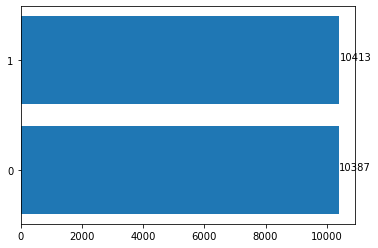

In [31]:
import matplotlib.pyplot as plt

x = ["0", "1"]
y = [len(data[data['label'] == 0 ]),len(data[data['label'] == 1 ])]
plt.barh(x, y)

for index, value in enumerate(y):
  plt.text(value, index, str(value))
    

## Merging the texts in corpus for word cloud

In [32]:
# converted corpus into ndArray
corpus_no_stop_0 = []
corpus_no_stop_1 = []
for i in range(0, len(corpus_0)):
    news = corpus_0[i].split()     # Spliting sentence into words to remove stopwords
    news = [wl.lemmatize(word) for word in news if not word in stopwords.words('english')]    #Performing Lemmatization & Removing stopwords from the sentence
    news = ' '.join(news)   # Rejoin the word to make a sentence and store it into corpus array
    corpus_no_stop_0.append(news)

print("corpus_no_stop_0 : ",len(corpus_no_stop_0))

corpus_no_stop_0 :  10387


In [33]:
# converted corpus into ndArray
for i in range(0, len(corpus_1)):
    news = corpus_1[i].split()     # Spliting sentence into words to remove stopwords
    news = [wl.lemmatize(word) for word in news if not word in stopwords.words('english')]    #Performing Lemmatization & Removing stopwords from the sentence
    news = ' '.join(news)   # Rejoin the word to make a sentence and store it into corpus array
    corpus_no_stop_1.append(news)

print("corpus_no_stop_1 : ",len(corpus_no_stop_1))

corpus_no_stop_1 :  10413


In [34]:

word_cloud_0 = ' '.join(corpus_no_stop_0 )    # derived associated fake news titles from corpus and merge it into one string
word_cloud_1 = ' '.join(corpus_no_stop_1)    # derived associated reliable news titles from corpus and merge it into one string

print("word_cloud_0 : ",len(word_cloud_0.split()),"\nword_cloud_1 : ",len(word_cloud_1.split()))

word_cloud_0 :  5119122 
word_cloud_1 :  3787429


## Word frequency in all the news titles

 Before removing duplicates from real news words :  5119122 
After removing duplicates from real news words :  85321
 Before removing duplicates from fake news words :  3787429 
After removing duplicates from fake news words :  96309

size of unique real words without duplicates :  41364 
size of unique fake words without duplicates :  52352

Length of unique real words :  126363

Length of unique fake words :  142736


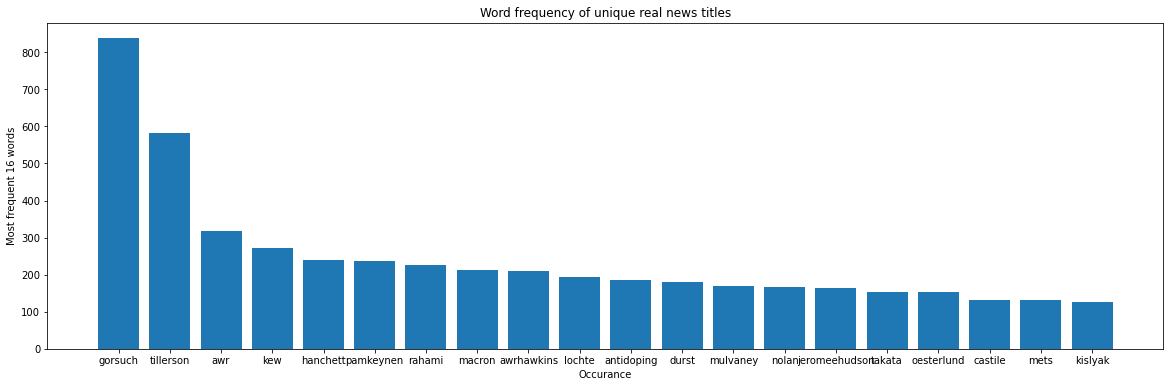

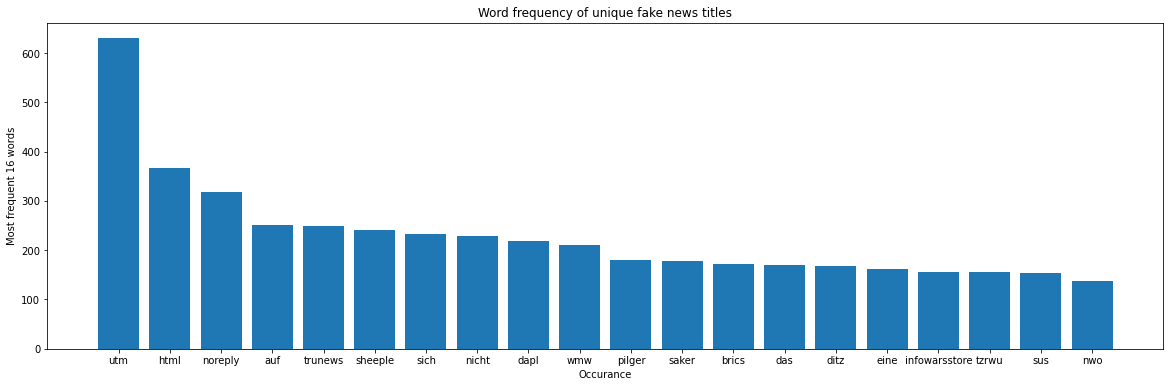

In [38]:
# creating sets of fake and real news' titles 
# by creating set it removes duplicates

words_0 = set(word_cloud_0.split())
words_1 = set(word_cloud_1.split())
print(" Before removing duplicates from real news words : ", len(word_cloud_0.split()),"\nAfter removing duplicates from real news words : ",len(words_0))
print(" Before removing duplicates from fake news words : ", len(word_cloud_1.split()),"\nAfter removing duplicates from fake news words : ",len(words_1))
# print("set of real news titles : ",words_0," : \nset of fake news titles : ",words_1)

unique_words_0 = words_0 - words_1
unique_words_1 = words_1 - words_0

# print("Unique real words : ", unique_words_0, "\nUnique fake words : ", unique_words_1)
print("\nsize of unique real words without duplicates : ", len(unique_words_0), "\nsize of unique fake words without duplicates : ", len(unique_words_1))

# unique_real_set_list = list(unique_words_0)
# unique_fake_set_list = list(unique_words_1)

unique_real_list = [word for word in word_cloud_0.split() if word in unique_words_0]
unique_fake_list = [word for word in word_cloud_1.split() if word in unique_words_1]

print("\nLength of unique real words : ",len(unique_real_list))
print("\nLength of unique fake words : ",len(unique_fake_list))

unique_real_string = ' '.join(unique_real_list)
unique_fake_string = ' '.join(unique_fake_list)

# function to get word count in a sentence
def word_count(str):
    counts = dict()
    words = str.split()

    for word in words:
        if word in counts:
            counts[word] += 1
        else:
            counts[word] = 1

    return counts

# sort the dictionary with word count decendent order
def sort_the_dictionary(dictionary):
  return dict(sorted(word_count(dictionary).items(), key=lambda item: item[1], reverse = True))


# getting top 16 records of dictionary
def get_top_16(all_words_count,digit):
  doc = dict()
  c = 0
  for kay in all_words_count:  
    doc[kay] = all_words_count[kay]
    c=c+1
    if c  == digit:
      break;
  return doc


# plot the bar chart from the list
def plot_the_graph(word_count_list,title,digit):
  plt.figure (figsize=(20, 6))
  plt.bar(get_top_16(word_count_list,digit).keys(),get_top_16(word_count_list,digit).values())
  plt.title(title)
  plt.xlabel('Occurance')
  plt.ylabel('Most frequent 16 words')
  plt.show()

# unique real words frequency
sorted_unique_dictionary_real = sort_the_dictionary(unique_real_string)
plot_the_graph(sorted_unique_dictionary_real,'Word frequency of unique real news titles',20)

# unique fake words frequency
sorted_unique_dictionary_fake = sort_the_dictionary(unique_fake_string)
plot_the_graph(sorted_unique_dictionary_fake,'Word frequency of unique fake news titles',20)



## Displaying number of words present into headlines of all the data

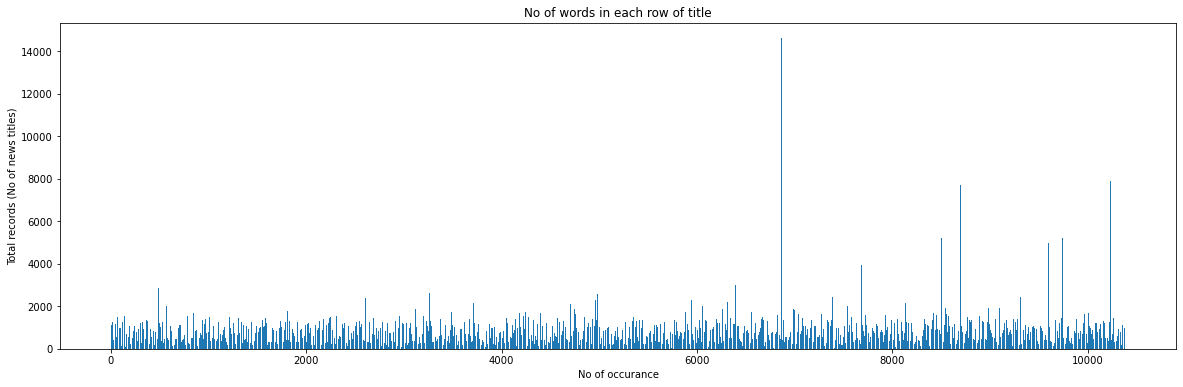

In [42]:
words_arr = np.char.split(corpus_0)
counts = []

for list in words_arr:
  counts.append(len(list))

plt.figure (figsize=(20, 6))
plt.bar(range(0, len(counts)), counts)
plt.title('No of words in each row of title')
plt.xlabel('No of occurance')
plt.ylabel('Total records (No of news titles)')
plt.show()

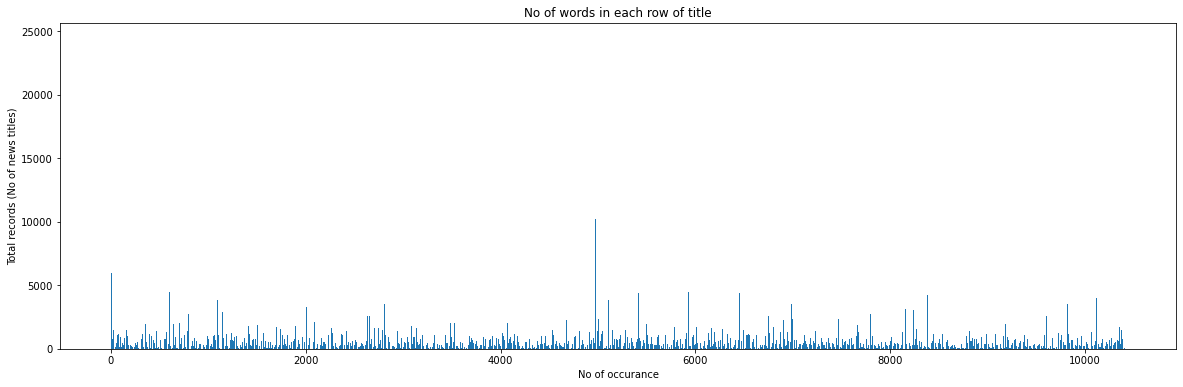

In [41]:
words_arr = np.char.split(corpus_1)
counts = []

for list in words_arr:
  counts.append(len(list))

plt.figure (figsize=(20, 6))
plt.bar(range(0, len(counts)), counts)
plt.title('No of words in each row of title')
plt.xlabel('No of occurance')
plt.ylabel('Total records (No of news titles)')
plt.show()

## Creating wordcloud of Fake and reliable news headlines

In [48]:
!pip install wordcloud
from wordcloud import WordCloud

wordcloud = WordCloud(width = 1500, height = 1500,
                background_color ='white', collocations=False,
                min_font_size = 10, max_words=20000).generate(unique_real_string)

wordcloud_1 = WordCloud(width = 1500, height = 1500,
                background_color ='white', collocations=False,
                min_font_size = 10, max_words=20000).generate(unique_fake_string)                


In [49]:
wordcloud.words_

{'gorsuch': 1.0,
 'tillerson': 0.6957040572792362,
 'awr': 0.3794749403341289,
 'kew': 0.3233890214797136,
 'hanchett': 0.2863961813842482,
 'pamkeynen': 0.2840095465393795,
 'rahami': 0.2756563245823389,
 'macron': 0.2529832935560859,
 'awrhawkins': 0.25059665871121717,
 'lochte': 0.23031026252983294,
 'antidoping': 0.22195704057279236,
 'durst': 0.2159904534606205,
 'mulvaney': 0.20286396181384247,
 'nolan': 0.19928400954653938,
 'jeromeehudson': 0.1957040572792363,
 'takata': 0.18377088305489261,
 'oesterlund': 0.18138424821002386,
 'castile': 0.15632458233890215,
 'mets': 0.15632458233890215,
 'airbag': 0.15274463007159905,
 'kislyak': 0.1515513126491647,
 'kassam': 0.14916467780429593,
 'warnerthuston': 0.14439140811455847,
 'igcolonel': 0.14439140811455847,
 'ianhanchett': 0.14200477326968974,
 'grammys': 0.13961813842482101,
 'ciccotta': 0.13961813842482101,
 'dznussbaum': 0.13842482100238662,
 'valeant': 0.12649164677804295,
 'oakley': 0.12529832935560858,
 'shear': 0.124105011

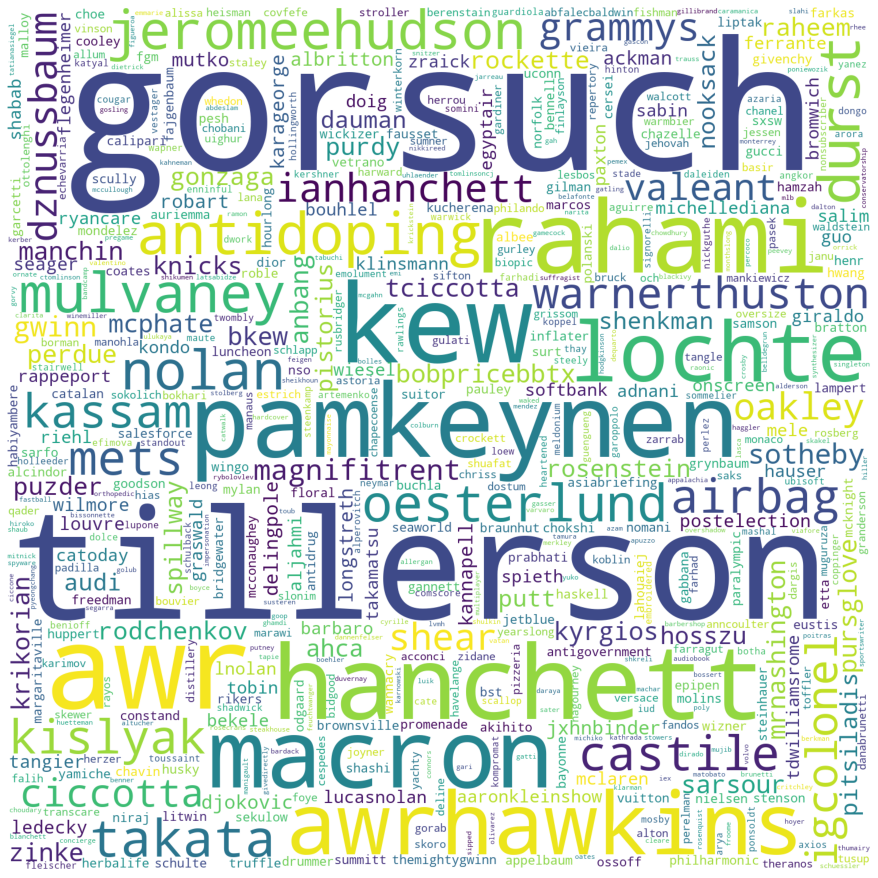

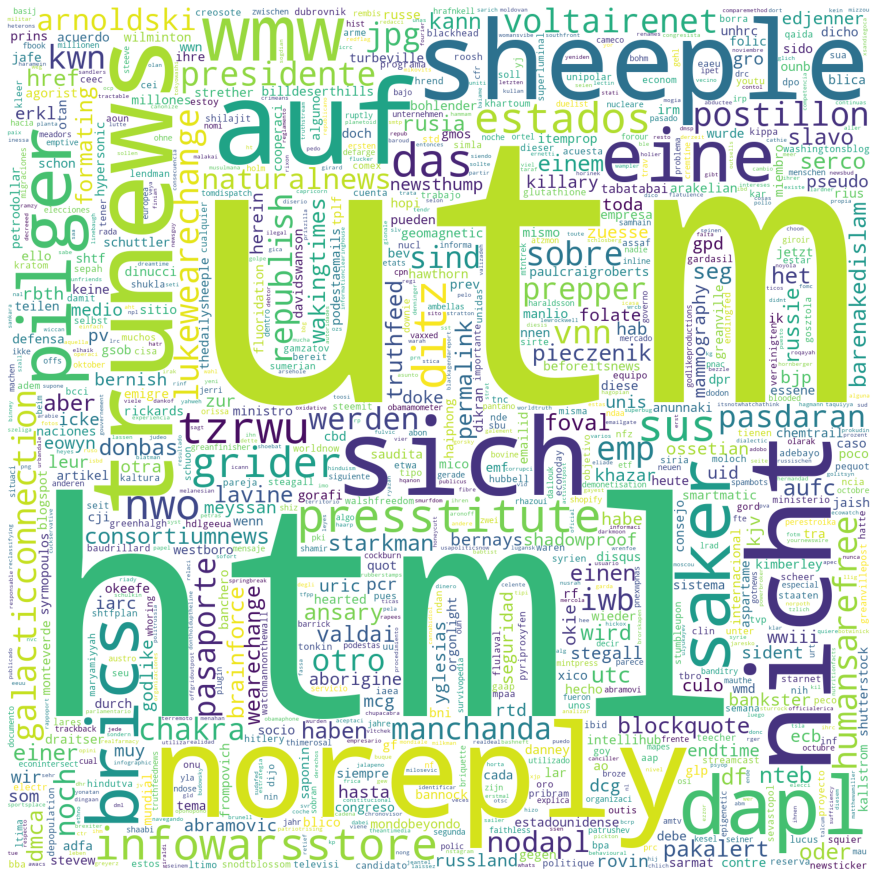

In [50]:
# plot the WordCloud image of reliable news                    
plt.figure(figsize = (12, 12), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

print('\n\n\n')
# plot the WordCloud image of fake news                    
plt.figure(figsize = (12, 12), facecolor = None)
plt.imshow(wordcloud_1)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()
